# Bigmart Sale Prediction

# importing libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pickle
import warnings
warnings.filterwarnings("ignore")

# Loading the Dataset

In [2]:
#reading and loading data
train = pd.read_csv(r"C:\Users\INTEL\Desktop\Projects/bigdatamart_train.csv")
test = pd.read_csv(r"C:\Users\INTEL\Desktop\Projects/bigdatamart_Test.csv")
test1 = test.copy()
train.shape,test.shape

((8523, 12), (5681, 11))

In [3]:
#viewing first 5 rows of the dataset train
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#viewing first 5 rows of the dataset test
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
#to check datatypes
train.dtypes , test.dtypes

(Item_Identifier               object
 Item_Weight                  float64
 Item_Fat_Content              object
 Item_Visibility              float64
 Item_Type                     object
 Item_MRP                     float64
 Outlet_Identifier             object
 Outlet_Establishment_Year      int64
 Outlet_Size                   object
 Outlet_Location_Type          object
 Outlet_Type                   object
 Item_Outlet_Sales            float64
 dtype: object,
 Item_Identifier               object
 Item_Weight                  float64
 Item_Fat_Content              object
 Item_Visibility              float64
 Item_Type                     object
 Item_MRP                     float64
 Outlet_Identifier             object
 Outlet_Establishment_Year      int64
 Outlet_Size                   object
 Outlet_Location_Type          object
 Outlet_Type                   object
 dtype: object)

In [6]:
#to know null values, datatypes, columns, memory usage of train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
# to know null values, datatypes, columns, memory usage of test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [8]:
#checking all the train dataset columns
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [9]:
#checking all the test dataset columns
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [10]:
#describing the train dataset(mean, median, standard deviation, etc)
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
#to know unique values of outlet size column of test dataset
test["Outlet_Size"].unique()

array(['Medium', nan, 'Small', 'High'], dtype=object)

In [12]:
#knowing nunique values of train dataset
train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [13]:
#knowing nunique values of test dataset
test.nunique()

Item_Identifier              1543
Item_Weight                   410
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

### EDA:

In [14]:
#checking missing values of train dataset
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

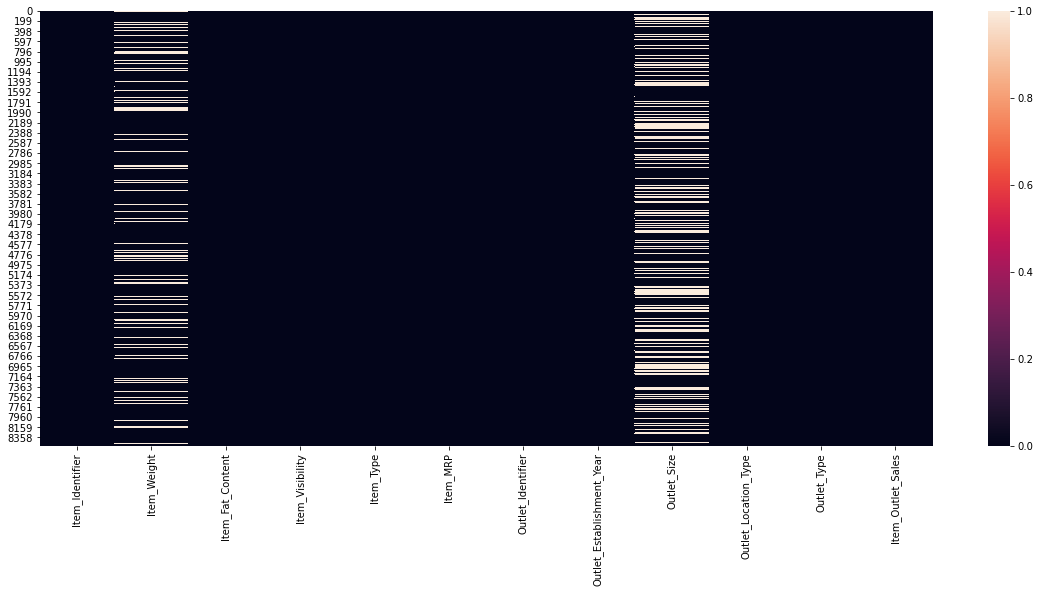

In [15]:
#another method to cheak missing values i.e, heatmap
plt.figure(figsize=(20,8))
sns.heatmap(train.isnull())
plt.show()            

In [16]:
#filling null values in the train dataset by mean, median
map1 = {"Small":1,"Medium":2,"High":3}
train["Outlet_Size"] = train["Outlet_Size"].map(map1)
train["Item_Weight"] = train["Item_Weight"].fillna(train.Item_Weight.mean())
train["Outlet_Size"] = train["Outlet_Size"].fillna(train["Outlet_Size"].median())

In [17]:
#checking missing values of train dataset after filling it
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [18]:
#filling null values in the test dataset by mean, median
map1 = {"Small":1,"Medium":2,"High":3}
test["Outlet_Size"] = test["Outlet_Size"].map(map1)
test["Item_Weight"] = test["Item_Weight"].fillna(test.Item_Weight.mean())
test["Outlet_Size"] = test["Outlet_Size"].fillna(test["Outlet_Size"].median())

In [19]:
#viewing first 5 rows of train dataset
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,2.0,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,2.0,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,2.0,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,2.0,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,3.0,Tier 3,Supermarket Type1,994.7052


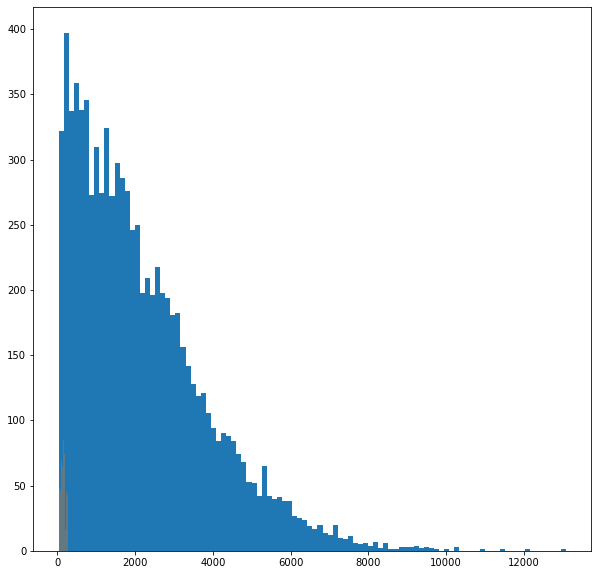

In [20]:
# plot histogram of item outlet sales and item MRP by histogram
plt.rcParams['figure.figsize'] = (10,10)
plt.hist(train["Item_Outlet_Sales"],bins = 100)
# plt.show()

# plt.rcParams['figure.figsize'] = (10,10)
plt.hist(train["Item_MRP"],alpha = 0.3,bins = 150)
plt.show()

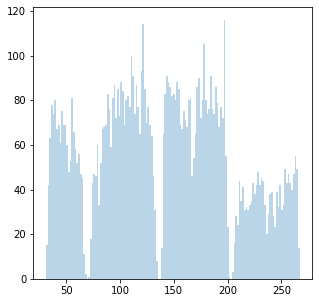

In [21]:
# visualizing item MRP of train dataset by histogram 
plt.rcParams['figure.figsize'] = (5,5)
plt.hist(train["Item_MRP"],alpha = 0.3,bins = 150)
plt.show()

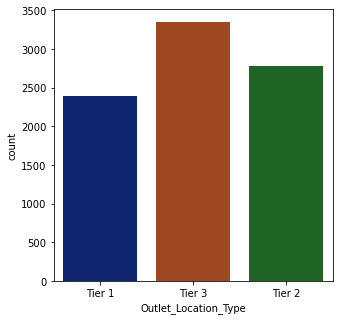

In [22]:
#Countplot of outlet_location_type of train dataset
sns.countplot(train["Outlet_Location_Type"],palette = 'dark')
plt.show()

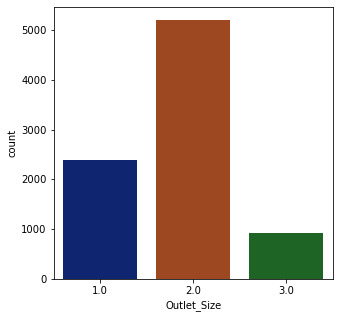

In [23]:
#countplot of outlet_size of train dataset
sns.countplot(train["Outlet_Size"],palette = 'dark')
plt.show()

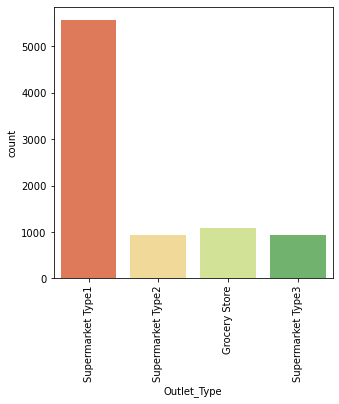

In [24]:
# countplot of outlet type of train dataset
sns.countplot(train["Outlet_Type"],palette = 'RdYlGn')
plt.xticks(rotation = 90)
plt.show()

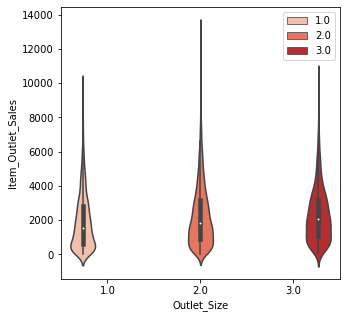

In [25]:
#visualizing oulet_size on x axis and item_outlet_sales on y axis by violinplot
sns.violinplot(x=train["Outlet_Size"],y=train["Item_Outlet_Sales"],hue = train["Outlet_Size"],palette = "Reds")
plt.legend()
plt.show()

In [26]:
#dropping the outlet establishment year column of both train and test dataset
train.drop(labels = ["Outlet_Establishment_Year"],inplace = True,axis =1)
test.drop(labels = ["Outlet_Establishment_Year"],inplace = True,axis =1)

In [27]:
#concat various columns of train dataset
feat = ['Outlet_Size','Outlet_Type','Outlet_Location_Type','Item_Fat_Content',"Item_Type"]
X = pd.get_dummies(train[feat])
train = pd.concat([train,X],axis=1)

In [28]:
#checking train dataset(first 5 rows)
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,2.0,Tier 1,Supermarket Type1,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2.0,Tier 3,Supermarket Type2,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,2.0,Tier 1,Supermarket Type1,...,0,0,0,0,1,0,0,0,0,0
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,2.0,Tier 3,Grocery Store,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,3.0,Tier 3,Supermarket Type1,...,0,0,0,1,0,0,0,0,0,0


In [29]:
#concat various columns of test dataset
feat = ['Outlet_Size','Outlet_Type','Outlet_Location_Type','Item_Fat_Content',"Item_Type"]
X1 = pd.get_dummies(test[feat])
test = pd.concat([test,X1],axis=1)

In [30]:
#again dropping various columns of both the dataset to balance
train.drop(labels = ["Outlet_Size",'Outlet_Location_Type',"Outlet_Type",'Item_Fat_Content','Outlet_Identifier','Item_Identifier',"Item_Type"],axis=1,inplace = True)
test.drop(labels = ["Outlet_Size",'Outlet_Location_Type',"Outlet_Type",'Item_Fat_Content','Outlet_Identifier','Item_Identifier',"Item_Type"],axis=1,inplace = True)

In [31]:
# dropping item outlet sales of train column and then checking both sets 
X_train = train.drop(labels = ["Item_Outlet_Sales"],axis=1)
y_train = train["Item_Outlet_Sales"]
X_train.shape,y_train.shape

((8523, 31), (8523,))

In [32]:
#top 5 rows of train dataset
train.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,0.016047,249.8092,3735.1380,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,0.019278,48.2692,443.4228,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0.016760,141.6180,2097.2700,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,19.20,0.000000,182.0950,732.3800,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,994.7052,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [33]:
#top 5 rows of y_train
y_train.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

### Scaling:

In [34]:
#using fit.transform
x = X_train.values #returns a numpy array
test_s = test.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled_train = min_max_scaler.fit_transform(x)
x_scaled_test = min_max_scaler.fit_transform(test_s)
df_train = pd.DataFrame(x_scaled_train)
df_test = pd.DataFrame(x_scaled_test)

In [35]:
#visualise top 5 rows
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.282525,0.048866,0.927507,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.081274,0.058705,0.072068,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.770765,0.051037,0.468288,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.871986,0.000000,0.640093,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.260494,0.000000,0.095805,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Building the model

In [36]:
#splitting the datas
X_train, X_test, y_train, y_test = train_test_split(df_train, y_train, test_size=0.4)

In [37]:
#using linear regression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [38]:
preds = model.predict(X_test)

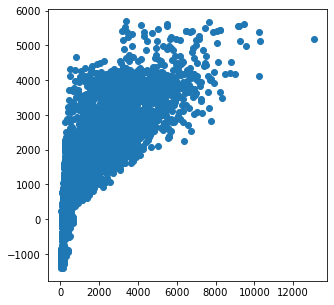

In [39]:
#scatterplot
plt.scatter(y_test, preds)
plt.show()

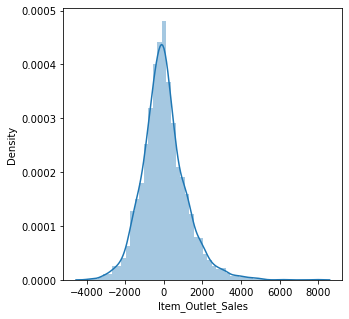

In [40]:
#distribution plot
sns.distplot((y_test-preds),bins=50)
plt.show()

## Model Evaluation:

In [41]:
#mean_absolute_error, mean_squared_error, mean_squared_error
print("MAE:", metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

MAE: 854.3072394134897
MSE: 1327918.2042316352
RMSE: 1152.3533330674386


In [42]:
predictions = model.predict(df_test)
final = pd.DataFrame({"Item_Identifier":test1["Item_Identifier"],"Outlet_Identifier":test1["Outlet_Identifier"],"Item_Outlet_Sales":abs(predictions)})
final.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1740.00
1,FDW14,OUT017,1405.25
2,NCN55,OUT010,1821.50
3,FDQ58,OUT017,2520.00
4,FDY38,OUT027,5147.00


In [43]:
filename ="BigDataMartSalesProblem.pkl"  #saving the model as a pickle
pickle.dump(predictions, open(filename, 'wb')) 